In [2]:
import pandas as pd

In [3]:
store = pd.read_csv('/content/store.csv')

In [4]:
test = pd.read_csv('/content/test.csv')

In [5]:
train = pd.read_csv('/content/train.csv', dtype={'StateHoliday': str})

# Sata Summarization

In [ ]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [ ]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
test.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [ ]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

# Data Quality Assessment

In [ ]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [ ]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

## Data Cleaning
**Impute missing values**

In [6]:
# 1. CompetitionDistance
median_competition_distance = store['CompetitionDistance'].median()

In [7]:
store['CompetitionDistance'].fillna(median_competition_distance, inplace=True)

In [ ]:
median_competition_distance

2325.0

In [8]:
# 2. CompetitionOpenSinceMonth
mode_competition_open_since_month = store['CompetitionOpenSinceMonth'].mode()[0]

In [9]:
store['CompetitionOpenSinceMonth'].fillna(mode_competition_open_since_month, inplace=True)

In [ ]:
mode_competition_open_since_month

9.0

In [10]:
# 3. CompetitionOpenSinceYear
mode_competition_open_since_year = store['CompetitionOpenSinceYear'].mode()[0]
store['CompetitionOpenSinceYear'].fillna(mode_competition_open_since_year, inplace=True)

In [ ]:
mode_competition_open_since_year

2013.0

In [11]:
# 4. Promo2SinceWeek
mode_promo2_since_week = store['Promo2SinceWeek'].mode()[0]
store['Promo2SinceWeek'].fillna(mode_promo2_since_week, inplace=True)

In [ ]:
mode_promo2_since_week

14.0

In [12]:
# 5. Promo2SinceYear
mode_promo2_since_year = store['Promo2SinceYear'].mode()[0]
store['Promo2SinceYear'].fillna(mode_promo2_since_year, inplace=True)

In [ ]:
mode_promo2_since_year

2011.0

In [13]:
# 6. PromoInterval
store['PromoInterval'].fillna('None', inplace=True)

In [ ]:
missing_values_after_imputation = store.isnull().sum()
missing_values_after_imputation

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

For the missing values in the Open column of the test dataset, we can impute them based on some logical assumptions or patterns observed in the data. One common approach is to assume that stores are open if there is no explicit indication that they are closed.

In [14]:
test['Open'].fillna(1, inplace=True)
test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

# Distribution of Promotions

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
promo_dist_train = train['Promo'].value_counts()
promo_dist_test = test['Promo'].value_counts()

promo_dist_train, promo_dist_test

(Promo
 0    629129
 1    388080
 Name: count, dtype: int64,
 Promo
 0    24824
 1    16264
 Name: count, dtype: int64)

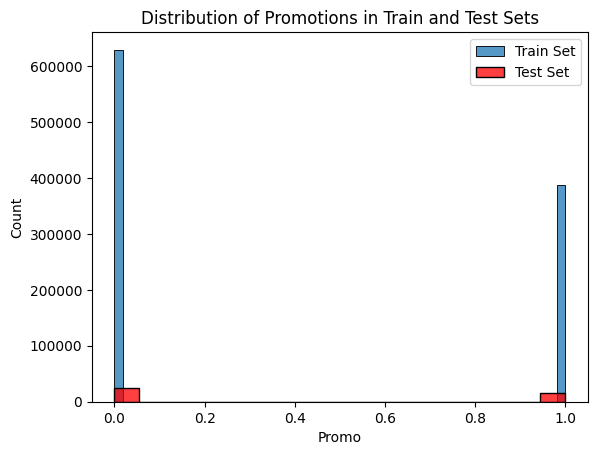

In [ ]:
sns.histplot(train['Promo'], kde=False, label='Train Set')
sns.histplot(test['Promo'], kde=False, label='Test Set', color='red')
plt.legend()
plt.title('Distribution of Promotions in Train and Test Sets')
plt.show()

### Training Set

**No Promotion:** 629,129 days                             
**Promotion:** 388,080 days

### Test Set
**No Promotion:** 24,824 days                              
**Promotion:** 16,264 days

**Insight:**
The distribution of promotions is relatively similar between the training and test sets, with a consistent ratio of no promotion to promotion days. This indicates that the promotional activity is stable over time and is likely to follow the same pattern in the test set as in the training set.

# Sales Behavior Around Holidays

In [10]:
#import holidays
# Define the country and year(s) of interest
#country_holidays = holidays.US(years=[2013, 2014, 2015])

In [16]:
# Filter holidays
holidays = train[train['StateHoliday'] != '0']

In [17]:
# Extract sales data around holidays
holidays_sales = holidays.groupby(['Date', 'StateHoliday'])['Sales'].sum().reset_index()

holidays_sales

,Date,StateHoliday,Sales
0,2013-01-01,a,97235
1,2013-01-06,a,9954
2,2013-03-29,b,213921
3,2013-04-01,b,241076
4,2013-05-01,a,200972
5,2013-05-09,a,233215
6,2013-05-20,a,253936
7,2013-05-30,a,685181
8,2013-08-15,a,194064
9,2013-10-03,a,285518


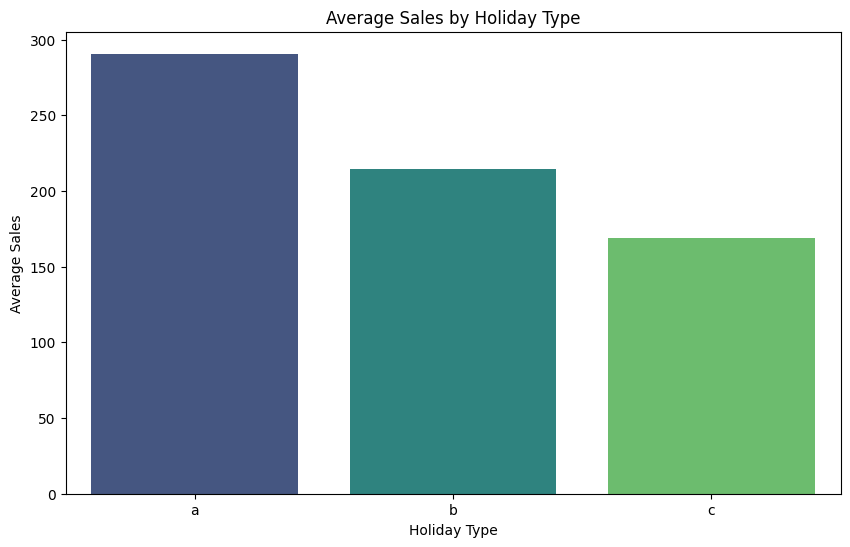

In [21]:
# Group by StateHoliday to calculate average sales
holiday_sales_avg = holidays.groupby('StateHoliday')['Sales'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='StateHoliday', y='Sales', data=holiday_sales_avg, palette='viridis', hue='StateHoliday')
plt.title('Average Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.show()

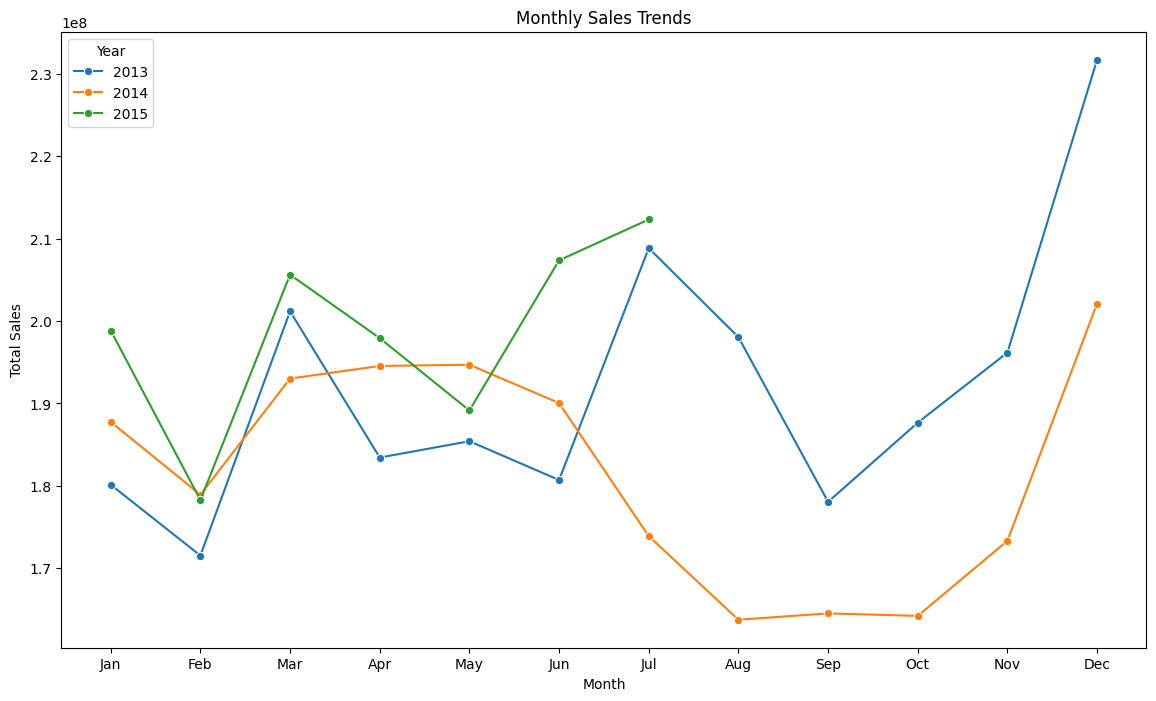

In [22]:
# Convert 'Date' to datetime format
train['Date'] = pd.to_datetime(train['Date'])

# Extract month and year from 'Date'
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year

# Group by year and month to calculate total sales
monthly_sales = train.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create the line plot for monthly sales trends
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales, palette='tab10', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

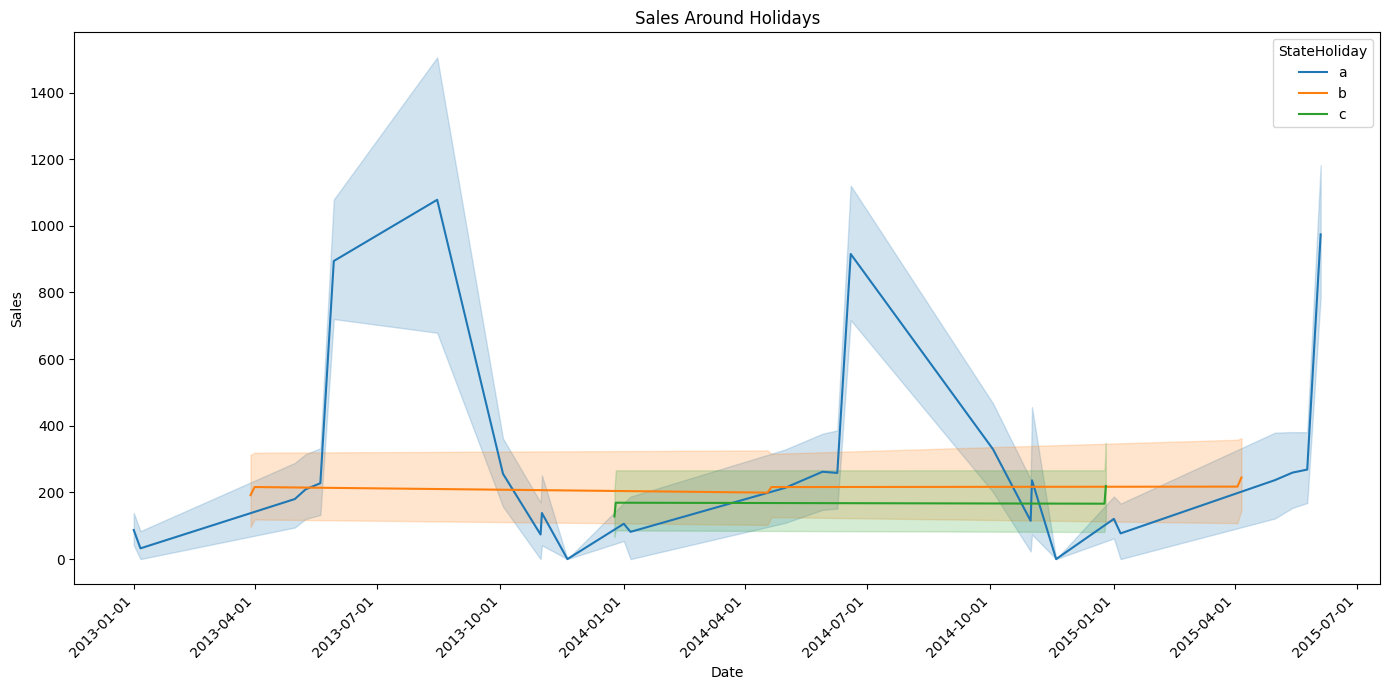

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
holidays = train[train['StateHoliday'] != '0']
plt.figure(figsize=(14,7))
sns.lineplot(data=holidays, x='Date', y='Sales', hue='StateHoliday')
# Rotate the x-axis labels and set a date format
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.title('Sales Around Holidays')
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

1. **Sales Spikes During Holidays**

  State Holiday 'a' (**Public Holiday**):

  Sales tend to be significantly higher on public holidays, with notable peaks observed. For example:
  May 30, 2013: 685,181
  June 19, 2014: 701,292
  June 4, 2015: 746,350
  State Holiday 'b' (Easter Holiday):

  Easter holidays also see substantial sales increases. For example:
  April 1, 2013: 241,076
  April 21, 2014: 240,988
  April 6, 2015: 272,921
  State Holiday 'c' (Christmas):

  Christmas holidays result in moderate to high sales spikes. For example:
  December 25, 2013: 142,585
  December 26, 2013: 188,597
  December 25, 2014: 155,386
  December 26, 2014: 205,238

2. Regular Patterns
Sales tend to follow a regular pattern around certain holidays each year. For example, the spike in sales during the May and June holidays each year suggests that these periods are consistently high-performing.
3. Importance of Holiday Planning
The consistent increase in sales during holidays indicates the importance of strategic planning for these periods. Marketing campaigns, promotions, and inventory planning should be tailored to leverage these high-traffic periods.
4. Variation Across Holiday Types
Sales behavior varies across different types of holidays. Public holidays (StateHoliday 'a') generally see the highest sales, followed by Easter holidays (StateHoliday 'b') and Christmas holidays (StateHoliday 'c'). This differentiation suggests that different holidays might require unique marketing strategies to maximize sales.

**Recommendations**
Targeted Promotions:
Develop targeted promotions and marketing campaigns specifically for high-sales holidays, especially public holidays in May and June.
Inventory Management:
Ensure adequate inventory levels during peak holiday periods to meet the increased demand.
Marketing Strategies:
Utilize data on past sales spikes to inform marketing strategies, emphasizing public holidays and Easter for maximum impact.
Holiday-Specific Offers:
Create holiday-specific offers and discounts to attract more customers and boost sales during these periods.

# Seasonal Purchase Behavior

In [26]:
import statsmodels.api as sm

In [27]:
decomposed = sm.tsa.seasonal_decompose(train['Sales'], model='additive', period=365)
seasonal = decomposed.seasonal
trend = decomposed.trend
residual = decomposed.resid

seasonal_data = seasonal.reset_index()
trend_data = trend.reset_index()
residual_data = residual.reset_index()

seasonal_data, trend_data, residual_data

(           index   seasonal
 0              0 -16.373981
 1              1  96.710885
 2              2  -8.111870
 3              3 -35.421425
 4              4 -50.278884
 ...          ...        ...
 1017204  1017204 -76.875832
 1017205  1017205 -42.186550
 1017206  1017206  99.139131
 1017207  1017207  -5.213532
 1017208  1017208  18.924376
 
 [1017209 rows x 2 columns],
            index  trend
 0              0    NaN
 1              1    NaN
 2              2    NaN
 3              3    NaN
 4              4    NaN
 ...          ...    ...
 1017204  1017204    NaN
 1017205  1017205    NaN
 1017206  1017206    NaN
 1017207  1017207    NaN
 1017208  1017208    NaN
 
 [1017209 rows x 2 columns],
            index  resid
 0              0    NaN
 1              1    NaN
 2              2    NaN
 3              3    NaN
 4              4    NaN
 ...          ...    ...
 1017204  1017204    NaN
 1017205  1017205    NaN
 1017206  1017206    NaN
 1017207  1017207    NaN
 1017208  10172

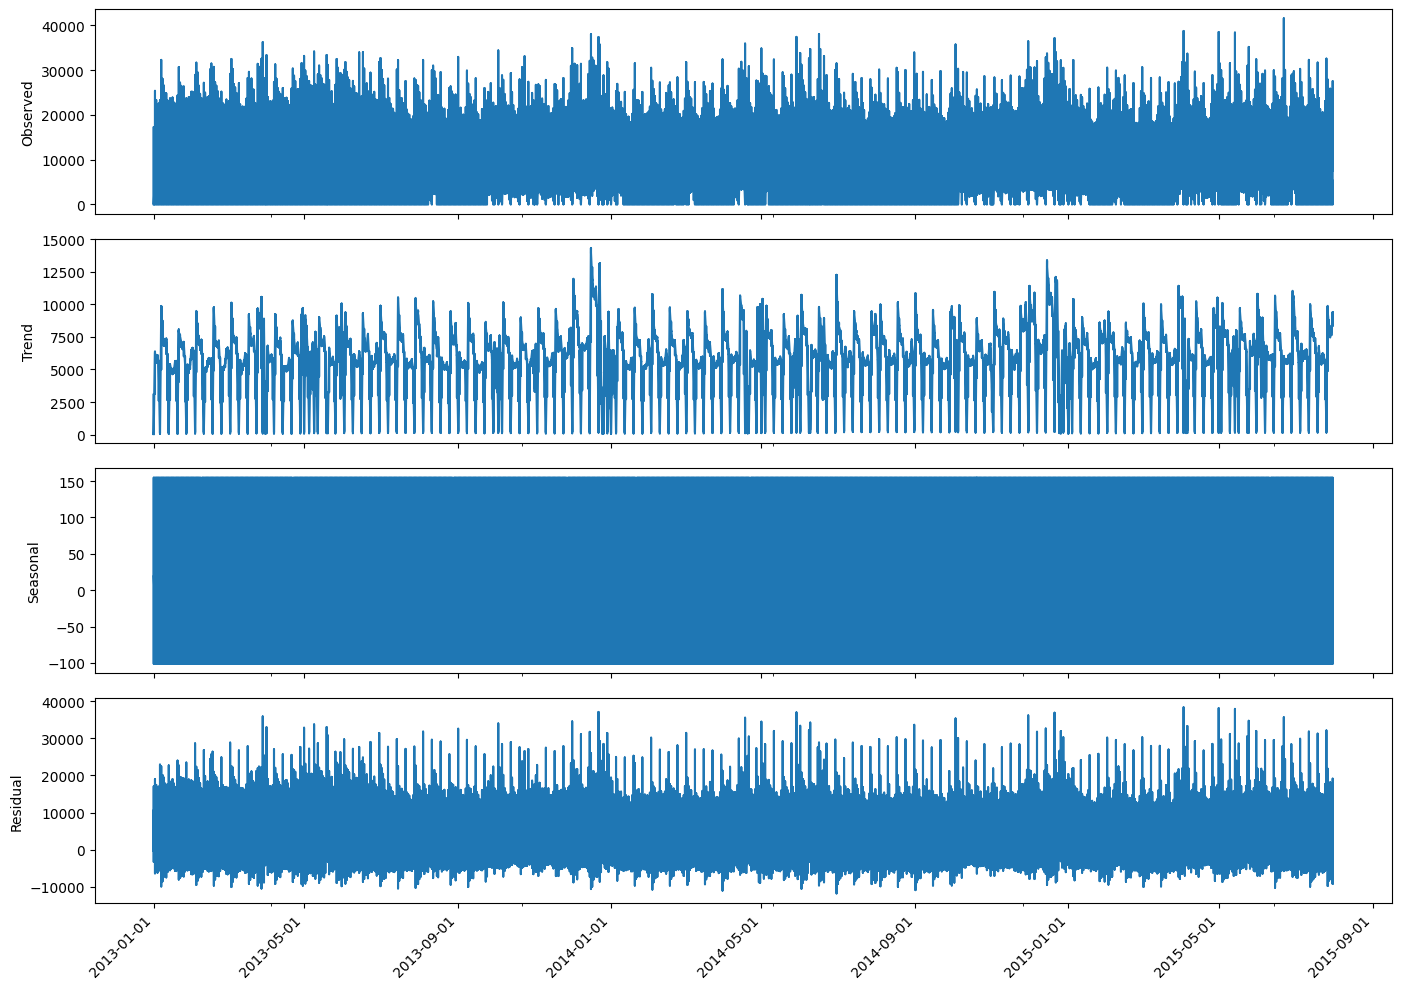

In [ ]:
# Set the 'Date' column as the index if not already done
# train.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposed = sm.tsa.seasonal_decompose(train['Sales'], model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

decomposed.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observed')

decomposed.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')

decomposed.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')

decomposed.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')

# Rotate the x-axis labels and format the dates
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)  # Rotate labels by 45 degrees
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the date

# Adjust layout to make room for rotated labels
plt.tight_layout()
plt.show()

# Correlation Between Sales and Customers

In [28]:
sales_customers_corr = train[['Customers', 'Sales']].corr().loc['Customers', 'Sales']
sales_customers_data = train[['Customers', 'Sales']]

sales_customers_corr, sales_customers_data

(0.8947107733016734,
          Customers  Sales
 0              555   5263
 1              625   6064
 2              821   8314
 3             1498  13995
 4              559   4822
 ...            ...    ...
 1017204          0      0
 1017205          0      0
 1017206          0      0
 1017207          0      0
 1017208          0      0
 
 [1017209 rows x 2 columns])

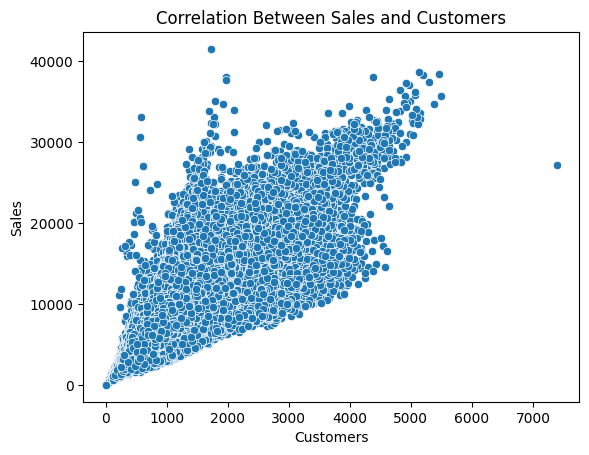

In [ ]:
sns.scatterplot(data=train, x='Customers', y='Sales')
plt.title('Correlation Between Sales and Customers')
plt.show()

# Impact of Promotions on Sales

In [29]:
promo_sales = train.groupby('Promo')['Sales'].describe().reset_index()

promo_sales

,Promo,count,mean,std,min,25%,50%,75%,max
0,0,629129.0,4406.050805,3442.450020,0.0,0.0,4622.0,6367.0,41551.0
1,1,388080.0,7991.152046,3419.025495,0.0,5922.0,7553.0,9603.0,38722.0


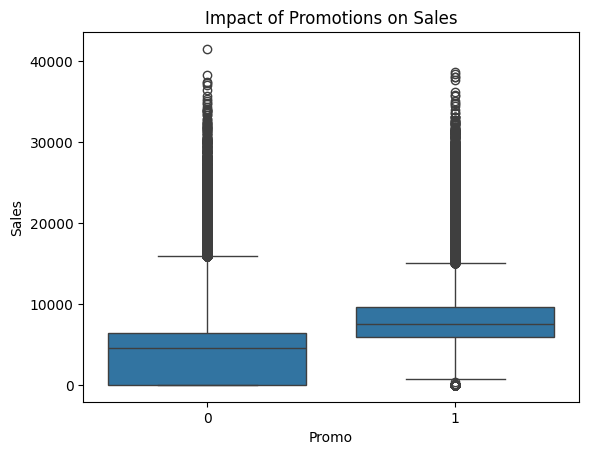

In [ ]:
sns.boxplot(data=train, x='Promo', y='Sales')
plt.title('Impact of Promotions on Sales')
plt.show()

# Assortment Type and Sales

In [30]:
merged_data = train.merge(store, on='Store')
assortment_sales = merged_data.groupby('Assortment')['Sales'].describe().reset_index()

assortment_sales

,Assortment,count,mean,std,min,25%,50%,75%,max
0,a,537445.0,5481.026096,3682.766186,0.0,3492.0,5463.0,7514.00,38722.0
1,b,8294.0,8553.931999,3882.418206,0.0,5523.0,8026.5,11233.25,22137.0
2,c,471470.0,6058.676567,3992.255662,0.0,4017.0,6039.0,8184.00,41551.0


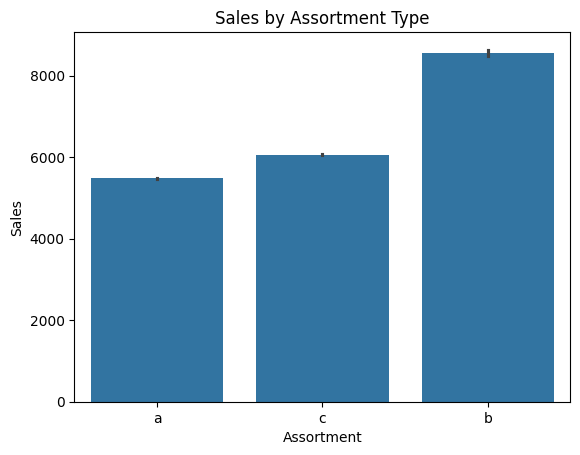

In [ ]:
merged_data = train.merge(store, on='Store')
sns.barplot(data=merged_data, x='Assortment', y='Sales')
plt.title('Sales by Assortment Type')
plt.show()

# Competitor Distance and Sales

In [31]:
competitor_sales_data = merged_data[['CompetitionDistance', 'Sales']]

competitor_sales_data

,CompetitionDistance,Sales
0,1270.0,5263
1,1270.0,5020
2,1270.0,4782
3,1270.0,5011
4,1270.0,6102
...,...,...
1017204,5350.0,4771
1017205,5350.0,4540
1017206,5350.0,4297
1017207,5350.0,3697


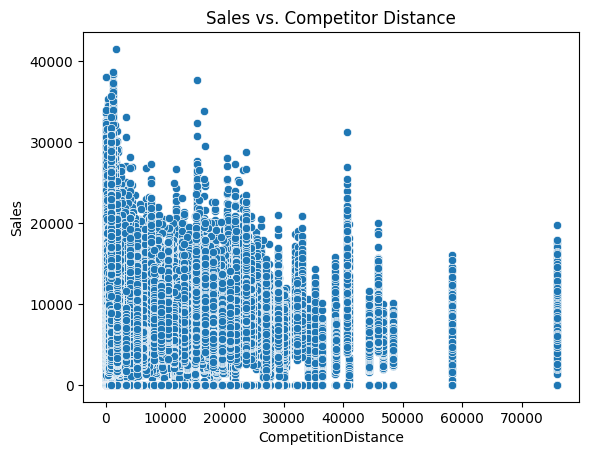

In [ ]:
sns.scatterplot(data=merged_data, x='CompetitionDistance', y='Sales')
plt.title('Sales vs. Competitor Distance')
plt.show()